In [1]:
import numpy as np
import pandas as pd
# from sklearn import preprocessing

## 데이터 불러오기

**현재 데이터 상황**  
첫번째 데이터 탐색 과정에서 만들어진 final data에  
\+ 승객 유형별 승하차인원 변수 (general / others)  
\+ 3시간 간격 승하차인원 변수 (1시간 간격 데이터를 3시간 간격으로)  
\+ 시내 시외버스 분류 변수 (in / out)  
\+ 3시간 간격 평균 강수량 변수  
\+ 특정 노선의 정류장이 흩어져 있는 정도를 점수화한 변수 (route score)  
\+ 특수한 정류장 분류 변수 (환승, 공항, 터미널, 학교 정류장)

In [2]:
data = pd.read_csv('final_school2.csv', encoding='ANSI')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bus_route_id         415423 non-null  int64  
 1   day                  415423 non-null  int64  
 2   date                 415423 non-null  object 
 3   station_code         415423 non-null  int64  
 4   station_name         415423 non-null  object 
 5   latitude             415423 non-null  float64
 6   longitude            415423 non-null  float64
 7   ride_total           415423 non-null  int64  
 8   takeoff_total        415423 non-null  int64  
 9   holiday              415423 non-null  int64  
 10  type_general_geton   415423 non-null  int64  
 11  type_other_geton     415423 non-null  int64  
 12  type_general_getoff  415423 non-null  float64
 13  type_other_getoff    415423 non-null  float64
 14  ride_6.9             415423 non-null  int64  
 15  ride_9.12        

In [3]:
data.sort_values(by='day', inplace=True)

## 강수량 변수 계속 유지하는 것이 맞을까?

In [19]:
data['강수량평균_6.9'].describe()

count    415423.000000
mean          1.218226
std           2.675800
min           0.000000
25%           0.000000
50%           0.000000
75%           0.375000
max           9.850000
Name: 강수량평균_6.9, dtype: float64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

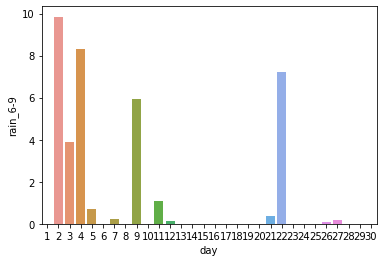

In [27]:
sns.barplot(x = data['day'], y = data['강수량평균_6.9'])
plt.ylabel('rain_6-9')
plt.show()

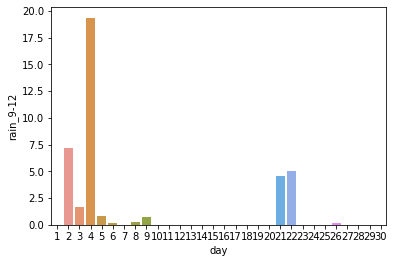

In [28]:
sns.barplot(x = data['day'], y = data['강수량평균_9.12'])
plt.ylabel('rain_9-12')
plt.show()

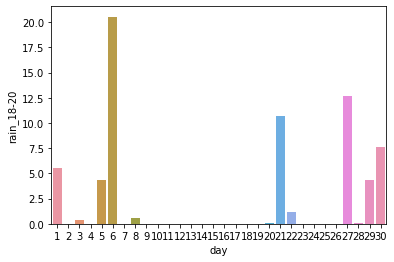

In [29]:
sns.barplot(x = data['day'], y = data['강수량평균_18.20'])
plt.ylabel('rain_18-20')
plt.show()

[강수량 그래프 결과]
- 6시 - 9시 : 6일, 7일 강수량 작음 (링링) / 22일 강수량 많음 (타파)
- 9시 - 12시 : 6일, 7일 강수량 작음 (링링) / 21일, 22일 강수량 많음 (타파)
- 18시 - 20시 : 6일 강수량 많음 (링링) / 21일 강수량 많음 (타파)

In [38]:
data[data['강수량평균_6.9']>=5].iloc[:, 19:23].corr()

,ride_18.20,강수량평균_6.9,강수량평균_9.12,강수량평균_18.20
ride_18.20,1.000000,0.011174,0.009738,-0.037358
강수량평균_6.9,0.011174,1.000000,0.479527,-0.199573
강수량평균_9.12,0.009738,0.479527,1.000000,-0.194579
강수량평균_18.20,-0.037358,-0.199573,-0.194579,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21b0966b5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x21b0966bb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b0966b3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21b09770208>],
 'fliers': [],
 'means': []}

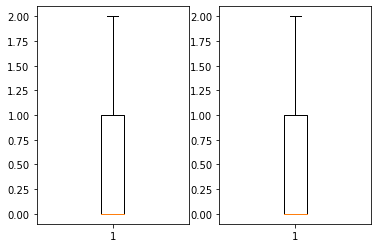

In [50]:
big_69 = data[data['강수량평균_6.9']>=5]
small_69 = data[data['강수량평균_6.9']<5]

plt.subplot(1,2,1)
plt.boxplot(big_69['ride_18.20'], showfliers=False)

plt.subplot(1,2,2)
plt.boxplot(small_69['ride_18.20'], showfliers=False)

In [39]:
data[data['강수량평균_9.12']>=5].iloc[:, 19:23].corr()

,ride_18.20,강수량평균_6.9,강수량평균_9.12,강수량평균_18.20
ride_18.20,1.000000,0.033408,0.021562,-0.045955
강수량평균_6.9,0.033408,1.000000,-0.265529,-0.714635
강수량평균_9.12,0.021562,-0.265529,1.000000,-0.484631
강수량평균_18.20,-0.045955,-0.714635,-0.484631,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21b0b096128>,
 'caps': [<matplotlib.lines.Line2D at 0x21b0b0967b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b0b089dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x21b0b096e48>],
 'fliers': [],
 'means': []}

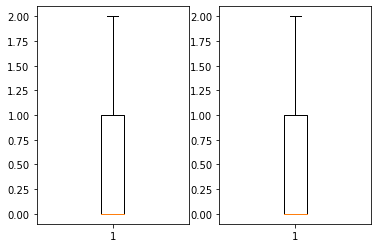

In [60]:
big_912 = data[data['강수량평균_9.12']>=5]
small_912 = data[data['강수량평균_9.12']<5]

plt.subplot(1,2,1)
plt.boxplot(big_912['ride_18.20'], showfliers=False)

plt.subplot(1,2,2)
plt.boxplot(small_912['ride_18.20'], showfliers=False)

In [40]:
data[data['강수량평균_18.20']>=5].iloc[:, 19:23].corr()

,ride_18.20,강수량평균_6.9,강수량평균_9.12,강수량평균_18.20
ride_18.20,1.000000,-0.009797,-0.035334,-0.051941
강수량평균_6.9,-0.009797,1.000000,0.823163,-0.034547
강수량평균_9.12,-0.035334,0.823163,1.000000,-0.065587
강수량평균_18.20,-0.051941,-0.034547,-0.065587,1.000000


count    70116.000000
mean         0.944763
std          3.748872
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        167.000000
Name: ride_18.20, dtype: float64


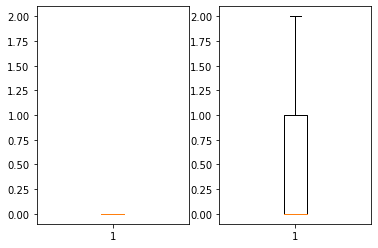

In [62]:
big_1820 = data[data['강수량평균_18.20']>=5]
small_1820 = data[data['강수량평균_18.20']<5]

plt.subplot(1,2,1)
plt.boxplot(big_1820['ride_18.20'], showfliers=False)
plt.ylim(-0.1,2.1)

plt.subplot(1,2,2)
plt.boxplot(small_1820['ride_18.20'], showfliers=False)
plt.ylim(-0.1,2.1)

print(big_1820['ride_18.20'].describe())

**[결론]   
강수량이 많을 때와 강수량이 적을때, 타겟변수 ride_18-20에 차이가 없음**

## 데이터 수정하기

기존의 평균 강수량 변수는 제거하고 태풍 변수를 추가할지 고려해보기

In [4]:
newdata = pd.DataFrame()

In [5]:
newdata['Day'] = data['day']
newdata['Holiday'] = data['holiday']
newdata['Route_id'] = data['bus_route_id']
newdata['Route_score'] = data['bus_route_score']
newdata['In_Out'] = data['in_out']
newdata['Station_code'] = data['station_code']
newdata['Station_name'] = data['station_name']
newdata['Latitude'] = data['latitude']
newdata['Longitude'] = data['longitude']
newdata['Transfer'] = data['transfer']
newdata['Airport'] = data['airport']
newdata['Terminal'] = data['terminal']
newdata['School'] = data['school']
newdata['Bus_interval'] = [0] * data.shape[0]
newdata['Geton_6-9'] = data['ride_6.9']
newdata['Geton_9-12'] = data['ride_9.12']
newdata['Getoff_6-9'] = data['takeoff_6.9']
newdata['Getoff_9-12'] = data['takeoff_9.12']
newdata['Geton_total'] = data['ride_total']
newdata['Getoff_total'] = data['takeoff_total']
newdata['Type_general_geton'] = data['type_general_geton']
newdata['Type_others_geton'] = data['type_other_geton']
newdata['Type_general_getoff'] = data['type_general_getoff']
newdata['Type_others_getoff'] = data['type_other_getoff']
newdata['Geton_18-20'] = data['ride_18.20']
# newdata['Typhoon'] = [0] * data.shape[0]

In [6]:
newdata.head()

,Day,Holiday,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,Longitude,Transfer,...,Geton_9-12,Getoff_6-9,Getoff_9-12,Geton_total,Getoff_total,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18-20
0,1,0,4270000,0.362711,시외,344,제주썬호텔,33.48990,126.49373,0,...,13,0,0,16,0,15,1,0.0,0.0,0
305927,1,0,29830000,0.183871,시내,96,제주민속오일장,33.49376,126.47670,0,...,0,0,0,2,0,2,0,2.0,0.0,2
305923,1,0,29830000,0.183871,시내,555,월평마을,33.46976,126.57519,0,...,0,0,0,2,0,1,1,0.0,0.0,0
305920,1,0,29830000,0.183871,시내,321,제주도청신제주로터리,33.49110,126.49647,0,...,0,1,2,3,3,1,2,2.0,1.0,1
305900,1,0,29830000,0.183871,시내,345,수협제주도지회,33.48987,126.49503,0,...,3,0,0,4,0,3,1,0.0,0.0,0


In [7]:
newdata.tail()

,Day,Holiday,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,Longitude,Transfer,...,Geton_9-12,Getoff_6-9,Getoff_9-12,Geton_total,Getoff_total,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18-20
379037,30,1,31890000,0.186757,시내,358,한라병원,33.48963,126.48600,0,...,2,1,2,4,3,3,1,2.0,1.0,8
379036,30,1,31890000,0.186757,시외,391,삼무공원사거리,33.48990,126.48892,0,...,1,0,2,2,2,1,1,2.0,0.0,4
280247,30,1,29040000,0.390395,시내,171,월구마을,33.50013,126.50700,0,...,0,0,1,0,1,0,0,1.0,0.0,0
91288,30,1,23290000,0.172075,시내,292,천수동,33.50934,126.54257,0,...,21,2,7,28,9,21,7,5.0,4.0,7
146911,30,1,24200000,0.082203,시내,122,인다마을,33.47064,126.54582,0,...,2,0,0,8,0,7,1,0.0,0.0,1


In [8]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415423 entries, 0 to 146911
Data columns (total 25 columns):
Day                    415423 non-null int64
Holiday                415423 non-null int64
Route_id               415423 non-null int64
Route_score            415423 non-null float64
In_Out                 415423 non-null object
Station_code           415423 non-null int64
Station_name           415423 non-null object
Latitude               415423 non-null float64
Longitude              415423 non-null float64
Transfer               415423 non-null int64
Airport                415423 non-null int64
Terminal               415423 non-null int64
School                 415423 non-null int64
Bus_interval           415423 non-null int64
Geton_6-9              415423 non-null int64
Geton_9-12             415423 non-null int64
Getoff_6-9             415423 non-null int64
Getoff_9-12            415423 non-null int64
Geton_total            415423 non-null int64
Getoff_total           415

In [9]:
newdata.to_csv('jeju_final_data.csv', index=False)

## 최종 데이터에 변수 추가

In [62]:
df = pd.read_csv('jeju_final_data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 25 columns):
Day                    415423 non-null int64
Holiday                415423 non-null int64
Route_id               415423 non-null int64
Route_score            415423 non-null float64
In_Out                 415423 non-null object
Station_code           415423 non-null int64
Station_name           415423 non-null object
Latitude               415423 non-null float64
Longitude              415423 non-null float64
Transfer               415423 non-null int64
Airport                415423 non-null int64
Terminal               415423 non-null int64
School                 415423 non-null int64
Bus_interval           415423 non-null int64
Geton_6-9              415423 non-null int64
Geton_9-12             415423 non-null int64
Getoff_6-9             415423 non-null int64
Getoff_9-12            415423 non-null int64
Geton_total            415423 non-null int64
Getoff_total           415

In [12]:
df.head()

,Day,Holiday,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,Longitude,Transfer,...,Geton_9-12,Getoff_6-9,Getoff_9-12,Geton_total,Getoff_total,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18-20
0,1,0,4270000,0.362711,시외,344,제주썬호텔,33.48990,126.49373,0,...,13,0,0,16,0,15,1,0.0,0.0,0
1,1,0,29830000,0.183871,시내,96,제주민속오일장,33.49376,126.47670,0,...,0,0,0,2,0,2,0,2.0,0.0,2
2,1,0,29830000,0.183871,시내,555,월평마을,33.46976,126.57519,0,...,0,0,0,2,0,1,1,0.0,0.0,0
3,1,0,29830000,0.183871,시내,321,제주도청신제주로터리,33.49110,126.49647,0,...,0,1,2,3,3,1,2,2.0,1.0,1
4,1,0,29830000,0.183871,시내,345,수협제주도지회,33.48987,126.49503,0,...,3,0,0,4,0,3,1,0.0,0.0,0


### 규칙적인 승차인원과 버스 배차간격 데이터 불러오기

In [85]:
# bus_bts 데이터 카드 기록으로 계산한 규칙적인 통근자수와 버스 노선 배차간격
df_commuter = pd.read_csv('jeju_commuter_data.csv')
df_interval = pd.read_csv('jeju_bus_interval_final.csv')

#### 오전시간에 해당 정류장에서 규칙적으로 승차하는 인원

In [64]:
df_commuter.columns = ['Station_code','commuter_count']
df_commuter.head()

,Station_code,commuter_count
0,1,1
1,2,24
2,3,1
3,4,73
4,5,23


In [65]:
print(df_commuter.shape[0])
print(len(np.unique(df_commuter['Station_code'])))

2066
2066


In [66]:
# 오류로 인해 통근자수가 0명인 데이터가 들어있는지 확인
df_commuter[df_commuter['commuter_count']==0]

,Station_code,commuter_count


In [67]:
df_result = pd.merge(df, df_commuter, on='Station_code', how='left')

In [68]:
station_code_null = np.unique(df_result[df_result['commuter_count'].isnull()==True]['Station_code'])
for i in range(len(station_code_null)):
    print(df_commuter[df_commuter['Station_code']==station_code_null[i]])

Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty Data

Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []
Empty DataFrame
Columns: [Station_code, commuter_count]
Index: []


#### 정류장마다 특정버스 배차간격 

In [78]:
df_interval.head()

,Route_id,Station_code,Bus_interval
0,4270000,344,35
1,4270000,357,28
2,4270000,432,42
3,4270000,1579,17
4,4270000,1636,58


In [69]:
df_interval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 3 columns):
Route_id        12811 non-null int64
Station_code    12811 non-null int64
Bus_interval    12811 non-null int64
dtypes: int64(3)
memory usage: 300.4 KB


In [70]:
del df_result['Bus_interval']

In [71]:
df_result = pd.merge(df_result, df_interval, on=['Route_id', 'Station_code'], how='left')

In [77]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415423 entries, 0 to 415422
Data columns (total 26 columns):
Day                    415423 non-null int64
Holiday                415423 non-null int64
Route_id               415423 non-null int64
Route_score            415423 non-null float64
In_Out                 415423 non-null object
Station_code           415423 non-null int64
Station_name           415423 non-null object
Latitude               415423 non-null float64
Longitude              415423 non-null float64
Transfer               415423 non-null int64
Airport                415423 non-null int64
Terminal               415423 non-null int64
School                 415423 non-null int64
Bus_interval           286706 non-null float64
Geton_6-9              415423 non-null int64
Geton_9-12             415423 non-null int64
Getoff_6-9             415423 non-null int64
Getoff_9-12            415423 non-null int64
Geton_total            415423 non-null int64
Getoff_total           4

In [90]:
df_final = df_result.dropna(subset=['Bus_interval'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286706 entries, 0 to 415422
Data columns (total 26 columns):
Day                    286706 non-null int64
Holiday                286706 non-null int64
Route_id               286706 non-null int64
Route_score            286706 non-null float64
In_Out                 286706 non-null object
Station_code           286706 non-null int64
Station_name           286706 non-null object
Latitude               286706 non-null float64
Longitude              286706 non-null float64
Transfer               286706 non-null int64
Airport                286706 non-null int64
Terminal               286706 non-null int64
School                 286706 non-null int64
Bus_interval           286706 non-null float64
Geton_6-9              286706 non-null int64
Geton_9-12             286706 non-null int64
Getoff_6-9             286706 non-null int64
Getoff_9-12            286706 non-null int64
Geton_total            286706 non-null int64
Getoff_total           2

In [93]:
df_final['Commuter_count'].fillna(0, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [94]:
# 최종 결측치 확인
sum(df_final.isna())

Day                    0
Holiday                0
Route_id               0
Route_score            0
In_Out                 0
Station_code           0
Station_name           0
Latitude               0
Longitude              0
Transfer               0
Airport                0
Terminal               0
School                 0
Bus_interval           0
Geton_6-9              0
Geton_9-12             0
Getoff_6-9             0
Getoff_9-12            0
Geton_total            0
Getoff_total           0
Commuter_count         0
Type_general_geton     0
Type_others_geton      0
Type_general_getoff    0
Type_others_getoff     0
Geton_18-20            0
dtype: int64

In [143]:
df_final = df_final.reset_index()

#### 태풍의 영향이 있는 날

In [164]:
typhoon = []
typhoon = [0] * 286706

태풍의 영향이 있는 날에는 1을, 평상시에는 0을 데이터로 갖고 있는 변수 

In [166]:
typhoon[49750:67845] = [1] * 18095
typhoon[191702:204831] = [1] * 13129

In [168]:
df_final['Typhoon'] = typhoon

In [169]:
df_final.head()

,index,Day,Holiday,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,Longitude,...,Getoff_9-12,Geton_total,Getoff_total,Commuter_count,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18-20,Typhoon
0,0,1,0,4270000,0.362711,시외,344,제주썬호텔,33.48990,126.49373,...,0,16,0,8.0,15,1,0.0,0.0,0,0
1,1,1,0,29830000,0.183871,시내,96,제주민속오일장,33.49376,126.47670,...,0,2,0,68.0,2,0,2.0,0.0,2,0
2,2,1,0,29830000,0.183871,시내,555,월평마을,33.46976,126.57519,...,0,2,0,24.0,1,1,0.0,0.0,0,0
3,3,1,0,29830000,0.183871,시내,321,제주도청신제주로터리,33.49110,126.49647,...,2,3,3,189.0,1,2,2.0,1.0,1,0
4,4,1,0,29830000,0.183871,시내,345,수협제주도지회,33.48987,126.49503,...,0,4,0,17.0,3,1,0.0,0.0,0,0


In [171]:
df_final.to_csv('jeju_final_data.csv', index=False)

[최종데이터 전처리에서 꼭 할 것]
- Route_score : 스케일 조절 (min-max / normalization / standardization)
- In_Out : 수치화 (label encoding)